Final Answer: 8
Feedback: Correct! Well done 🎉
Attempts: 2


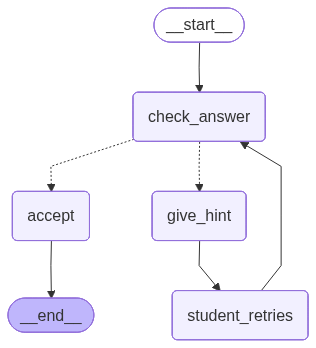

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	check_answer(check_answer)
	give_hint(give_hint)
	student_retries(student_retries)
	accept(accept)
	__end__([<p>__end__</p>]):::last
	__start__ --> check_answer;
	check_answer -.-> accept;
	check_answer -.-> give_hint;
	give_hint --> student_retries;
	student_retries --> check_answer;
	accept --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [4]:
from typing import TypedDict, Dict, Any
from langgraph.graph import StateGraph

# -------------------- 1) State --------------------
class HomeworkState(TypedDict):
    question: str
    student_answer: str
    correct: bool
    feedback: str
    attempts: int

# -------------------- 2) Nodes --------------------

def check_answer(state: Dict[str, Any]) -> Dict[str, Any]:
    state["correct"] = state["student_answer"].strip() == "8"
    return state

def give_hint(state: Dict[str, Any]) -> Dict[str, Any]:
    state["feedback"] = "Hint: 5 + 3 = ?"
    state["attempts"] += 1
    return state

def student_retries(state: Dict[str, Any]) -> Dict[str, Any]:
    # Simulate student learning
    if state["attempts"] == 1:
        state["student_answer"] = "7"
    else:
        state["student_answer"] = "8"
    return state

def accept(state: Dict[str, Any]) -> Dict[str, Any]:
    state["feedback"] = "Correct! Well done 🎉"
    return state

# -------------------- 3) Decision --------------------
def decide(state: Dict[str, Any]) -> str:
    return "accept" if state["correct"] else "give_hint"

# -------------------- 4) Build Graph --------------------

builder = StateGraph(HomeworkState)

builder.add_node("check_answer", check_answer)
builder.add_node("give_hint", give_hint)
builder.add_node("student_retries", student_retries)
builder.add_node("accept", accept)

builder.set_entry_point("check_answer")

builder.add_conditional_edges(
    "check_answer",
    decide,
    {
        "accept": "accept",
        "give_hint": "give_hint"
    }
)

builder.add_edge("give_hint", "student_retries")
builder.add_edge("student_retries", "check_answer")

builder.set_finish_point("accept")

graph = builder.compile()

# -------------------- 5) Run --------------------

state = {
    "question": "What is 5 + 3?",
    "student_answer": "6",   # first wrong
    "correct": False,
    "feedback": "",
    "attempts": 0
}

result = graph.invoke(state)

print("Final Answer:", result["student_answer"])
print("Feedback:", result["feedback"])
print("Attempts:", result["attempts"])


from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

print(graph.get_graph().draw_mermaid())


In [6]:
import os
from dotenv import load_dotenv
from typing import TypedDict, Dict, Any

from langgraph.graph import StateGraph
from langchain_openai import ChatOpenAI

# Load API key
load_dotenv(".env")

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# -------------------- 1) State --------------------
class QAState(TypedDict):
    question: str
    answer: str
    good: bool
    attempts: int

# -------------------- 2) Nodes --------------------

def generate_answer(state: Dict[str, Any]) -> Dict[str, Any]:
    response = llm.invoke(state["question"])
    state["answer"] = response.content
    return state

def check_answer(state: Dict[str, Any]) -> Dict[str, Any]:
    prompt = f"""
    Question: {state['question']}
    Answer: {state['answer']}

    Is this answer correct and useful? Reply only YES or NO.
    """
    result = llm.invoke(prompt).content.strip()
    state["good"] = result == "YES"
    return state

def improve_answer(state: Dict[str, Any]) -> Dict[str, Any]:
    prompt = f"""
    Improve this answer:
    {state['answer']}
    """
    state["answer"] = llm.invoke(prompt).content
    state["attempts"] += 1
    return state

def finish(state: Dict[str, Any]) -> Dict[str, Any]:
    return state

# -------------------- 3) Decision --------------------
def decide(state: Dict[str, Any]) -> str:
    return "finish" if state["good"] else "improve_answer"

# -------------------- 4) Build Graph --------------------

builder = StateGraph(QAState)

builder.add_node("generate_answer", generate_answer)
builder.add_node("check_answer", check_answer)
builder.add_node("improve_answer", improve_answer)
builder.add_node("finish", finish)

builder.set_entry_point("generate_answer")
builder.add_edge("generate_answer", "check_answer")

builder.add_conditional_edges(
    "check_answer",
    decide,
    {
        "finish": "finish",
        "improve_answer": "improve_answer"
    }
)

builder.add_edge("improve_answer", "check_answer")
builder.set_finish_point("finish")

graph = builder.compile()

# -------------------- 5) Run --------------------

state = {
    "question": "What is LangGraph?",
    "answer": "",
    "good": False,
    "attempts": 0
}

result = graph.invoke(state)

print("\nFinal Answer:\n", result["answer"])
print("Attempts:", result["attempts"])



Final Answer:
 As of my last knowledge update in October 2023, LangGraph is not a widely recognized term or concept in mainstream technology, literature, or academia. It could potentially refer to a specific project, tool, or framework that has emerged recently or is niche in nature.

If LangGraph is a new technology, software, or concept that has gained attention after my last update, I recommend checking the latest resources, official websites, or news articles for the most accurate and up-to-date information. If you have more context or details about LangGraph, I would be happy to help clarify or provide related information!
Attempts: 0
